#### Data split for taining and evaluation

In order to evaluate the performance of a model, especially for applications where you have lots of features, which makes it difficult to plot $f(x)$ and use any graphical methods for evaluation, a more systematic way would be to train and evaluate the model with different splits of data.

<br><b>I. Train / Test split</b>
* Split the data into 2 subsets:
  * 70% - 80% training set
  * 20% - 30% test set 
* Train only with the training set and test only with the test set.
* Compute 2 cost functions:
  * Training $J_{train} = J(\vec{w},b) + reg\_term$ → <u>with</u> regularization
  * Test $J_{test} = J(\vec{w},b)$ → <u>without</u> regularizarion
* If the model overfits - then $J_{train}$ will be close to $0$ and $J_{test}$ will be high.
* This type of model evaluation is simple and fast, useful for quick prototyping or large datasets, but the performance estimate can be noisy — i.e. it depends heavily on how the data is split, therefore accidental overfit is possible due to tweaking the model based on test results (test leakage).

<br><b>II. Train / Validation / Test split</b> 
* Split the data into 2 subsets:
  * 60% training set
  * 20%  validation set
  * 20% test set
* Compute 3 cost functions:
  * Training $J_{train} = J(\vec{w},b) + reg\_term$ → <u>with</u> regularization
  * Validation $J_{cv} = J(\vec{w},b)$ → <u>without</u> regularizarion
  * Test $J_{test} = J(\vec{w},b)$ → <u>without</u> regularizarion
* "Cross validation set" is also called "development set" or "dev set"
* Try to fit several models and select the model with the lowest $J_{cv}$.
* In case of overfit - $J_{train}$ will be close to $0$ and $J_{cv}$ will be high.
* Finally, report a generalizarion error $J_{test}$  using the test set.
* This type of data split separates the model selection from final evaluation, giving a more reliable generalization estimate. It also helps prevent overfitting during model tuning. However if less data is available for training, which can be especially problematic for small datasets.  

#### Bias and variance during model evaluation
* Gives an idea how to improve the model further.
* High bias means the model underfits the dataset.
* High variance means the model overfits the dataset.
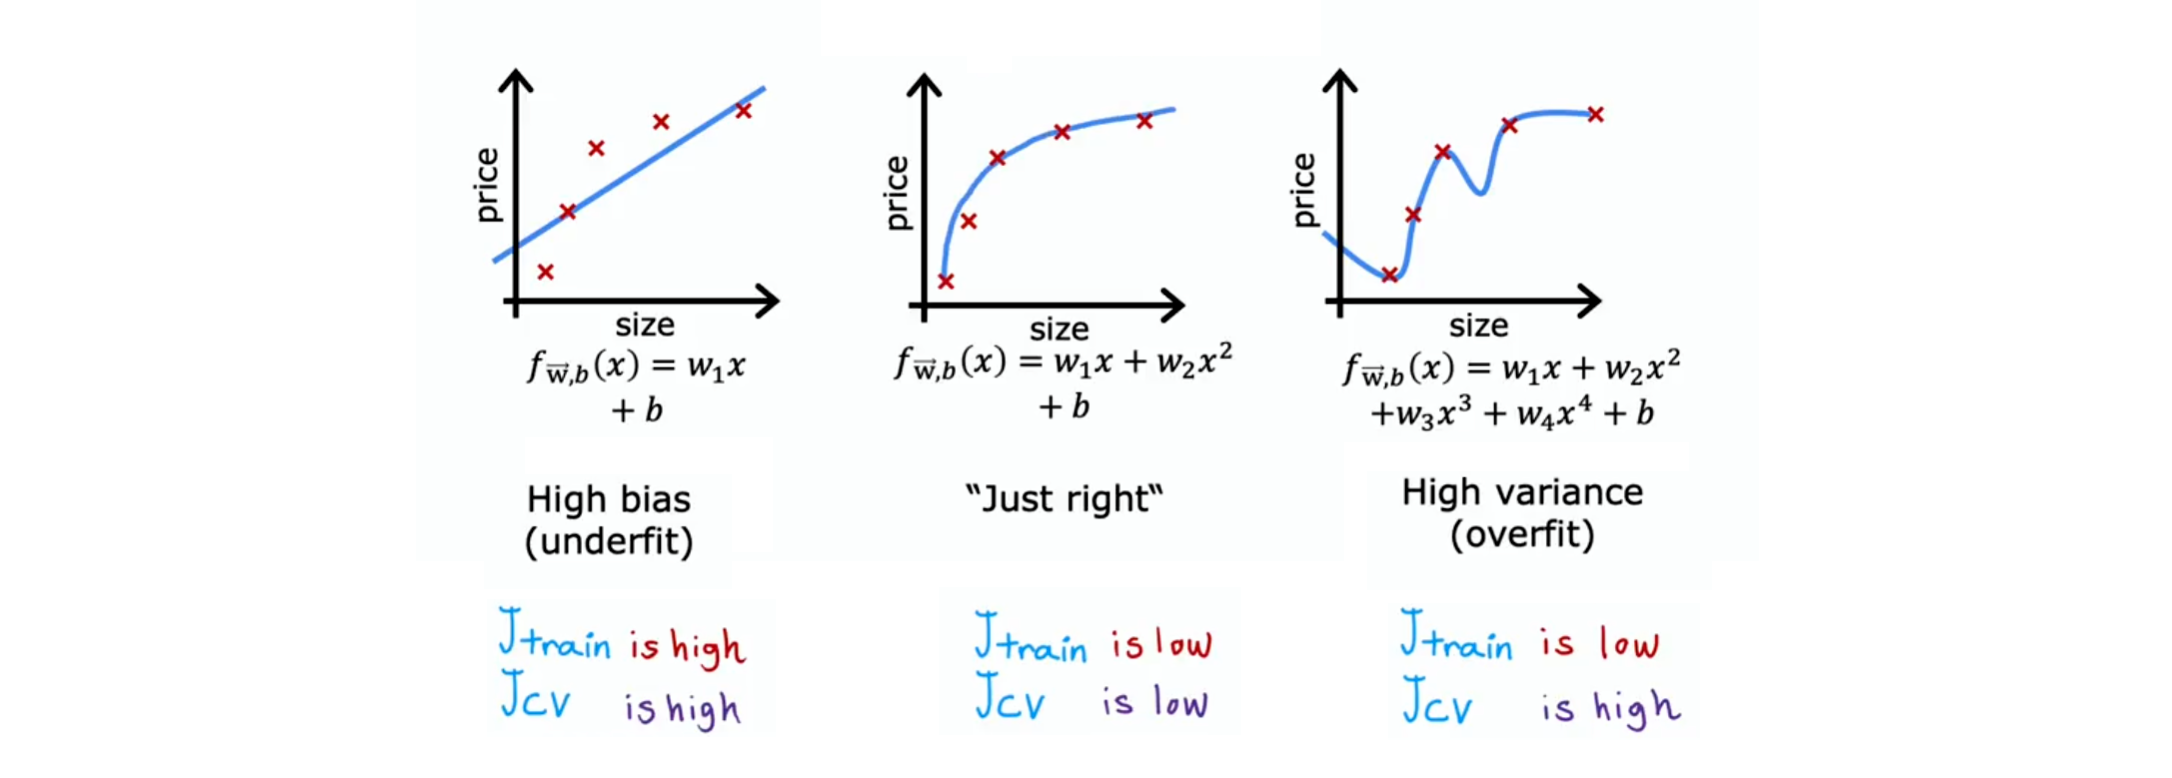

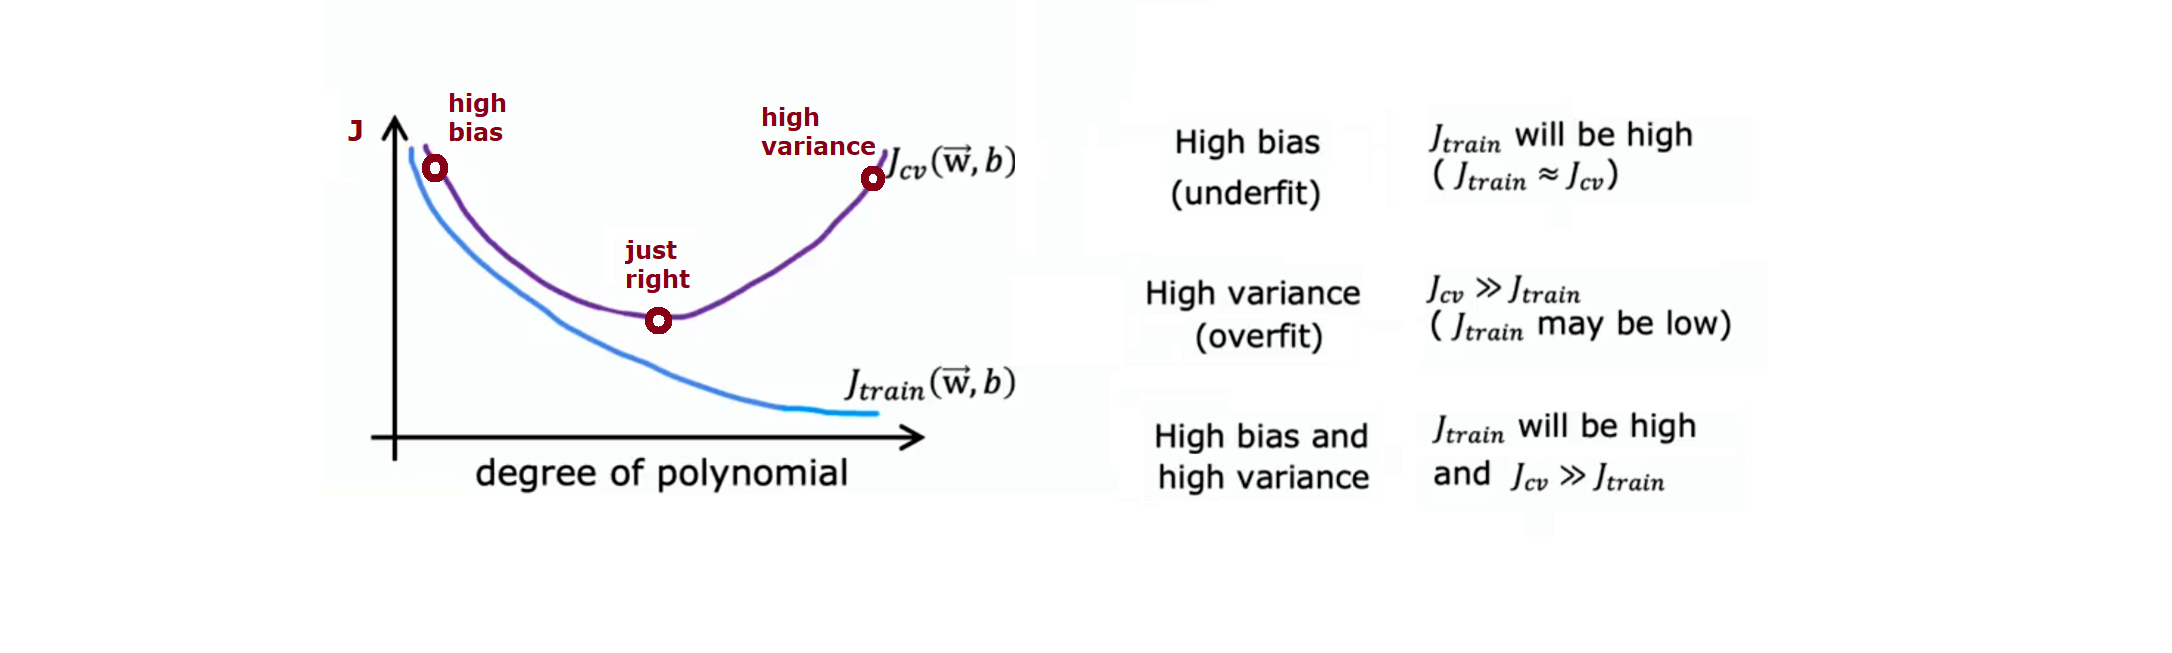
* If you plot $J_{train}$ as a function of the degree of polynomial $d$, as you fit a higher and higher degree polynomial (assuming for simplicity that  regularization is not used here) - $J_{train}$ tends to go down, since a higer order polynomial fits the training data better and better.
* If the degree of the polynomial is too low, $J_{cv}$ will be high because the model underfits the data (high bias). If the degree of polynomial is very large, $J_{cv}$ again will be high, because the model overfits (high variance).  
* If your learning algorithm has <u>high bias</u>, the key indicator will be if $J_{train}$ is high (corresponds to the  leftmost portion of the curve).
* If your learning algorithm has <u>high variance</u>, the key indicator will be if $J_{cv}$ is much greater than $J_{train}$ (corresponds to the  rightmost portion of the curve).
* If the performance of the learning algorithm is "just right" - it is somewhere in the middle, with a lower cross-validation error $J_{cv}$ and neither high bias nor high variance.
* In some cases, is possible to simultaneously have high bias and have high variance - it doesn't really happen for linear models, but if you're training a neural network, there are some applications where unfortunately you have high bias and high variance. One way to recognize that situation will be if $J_{train}$ is high, so you're not doing that well on the training set, but even worse, the cross-validation error $J_{cv}$ is again, even much larger than the training error. The intuition behind it is that for part of the input, you have a very complicated model that overfits on part of the input. But then for some reason, for other part of the input, it doesn't even fit the training data well, i.e it underfits for it. The indicator for that will be if the algorithm does poorly on the training set, and than if it even does much worse on the training set. 

#### Bias, variance and how regularization affects them 

* Regularization gets us the trade-off between keeping parameters small and fitting too well to the training data (overfitting).
* If $\lambda$ is very large, the algorithm is highly motivated to keep the parameters $w$ very small. The model would therefore approximate a streight line: $f_{w,b}(x) = b$ 
* If $\lambda = 0$ or is very small, there is no regularization. The algorithm may overfit (hight variance), resulting in small $J_{train}$ and high $J_{cv}$.
* If $\lambda$ is intermediate (appropriate), the algorithm is able to find such parameters $w$ that make both $J_{train}$ and $J_{cv}$ small ("just right"). 
* How to chose the regularization parameter $\lambda$?
  * Try the model with a set of $\lambda$, such as [0; 0.1; 0.2 ... 8; 9; 10] and calculate $J_{cv}$ for each one of them.
  * Pick the $\lambda$ and corresponding $w, b$ that minimize $J_{cv}$
  * Finally, report test error $J_{test} (w, b)$ 

#### Establishing a base level of performance

Used as a benchmark or reference point is used to help evaluate how well your model is performing. Real-world data can be very noisy, and achieving a 0% error rate is often infeasible. For example, suppose you're working on a computer vision application and observe a 10% training error and a 15% cross-validation error, which might suggest a high bias problem. However, even a human can’t achieve an error rate lower than 10%. If you consider this the baseline, then the problem instead becomes one of high variance, because the priority is now minimizing the gap between cross-validation and training error.
 
* Reference:
  * Error of human level performance.  
  * Performance of another (previous) implementation or a competing algorithm.
  * Guess based on experience.
* Evaluation process:
  * Calculate $A) \; baseline \; level \; performance$  + $B) \; J_{train}$ +  $C) \; J_{cv}$ and the difference between these values.
  * The gap between $A$ and $B$ evaluates bias.
  * The gap between $B$ and $C$ evaluates variance.
* Examples of base level performance estimation:
  * high variance: $A$=10.6% &larr; (0.2%) &rarr; $B$=10.8% &larr; (4.0%) &rarr; $C$=14.8%
  * high bias: $A$=10.6% &larr; (4.4%) &rarr; $B$=15.0% &larr; (0.5%) &rarr; $C$=15.5%
  * high bias & high variance: $A$=10.6% &larr; (4.4%) &rarr; $B$=15.00% &larr; (4.7%) &rarr; $C$=19.7% 

#### Bias, varians and learning curves

"Experience"-based performance depends on the number of samples which the model have seen during training. This performance can be visualized with learning curve.
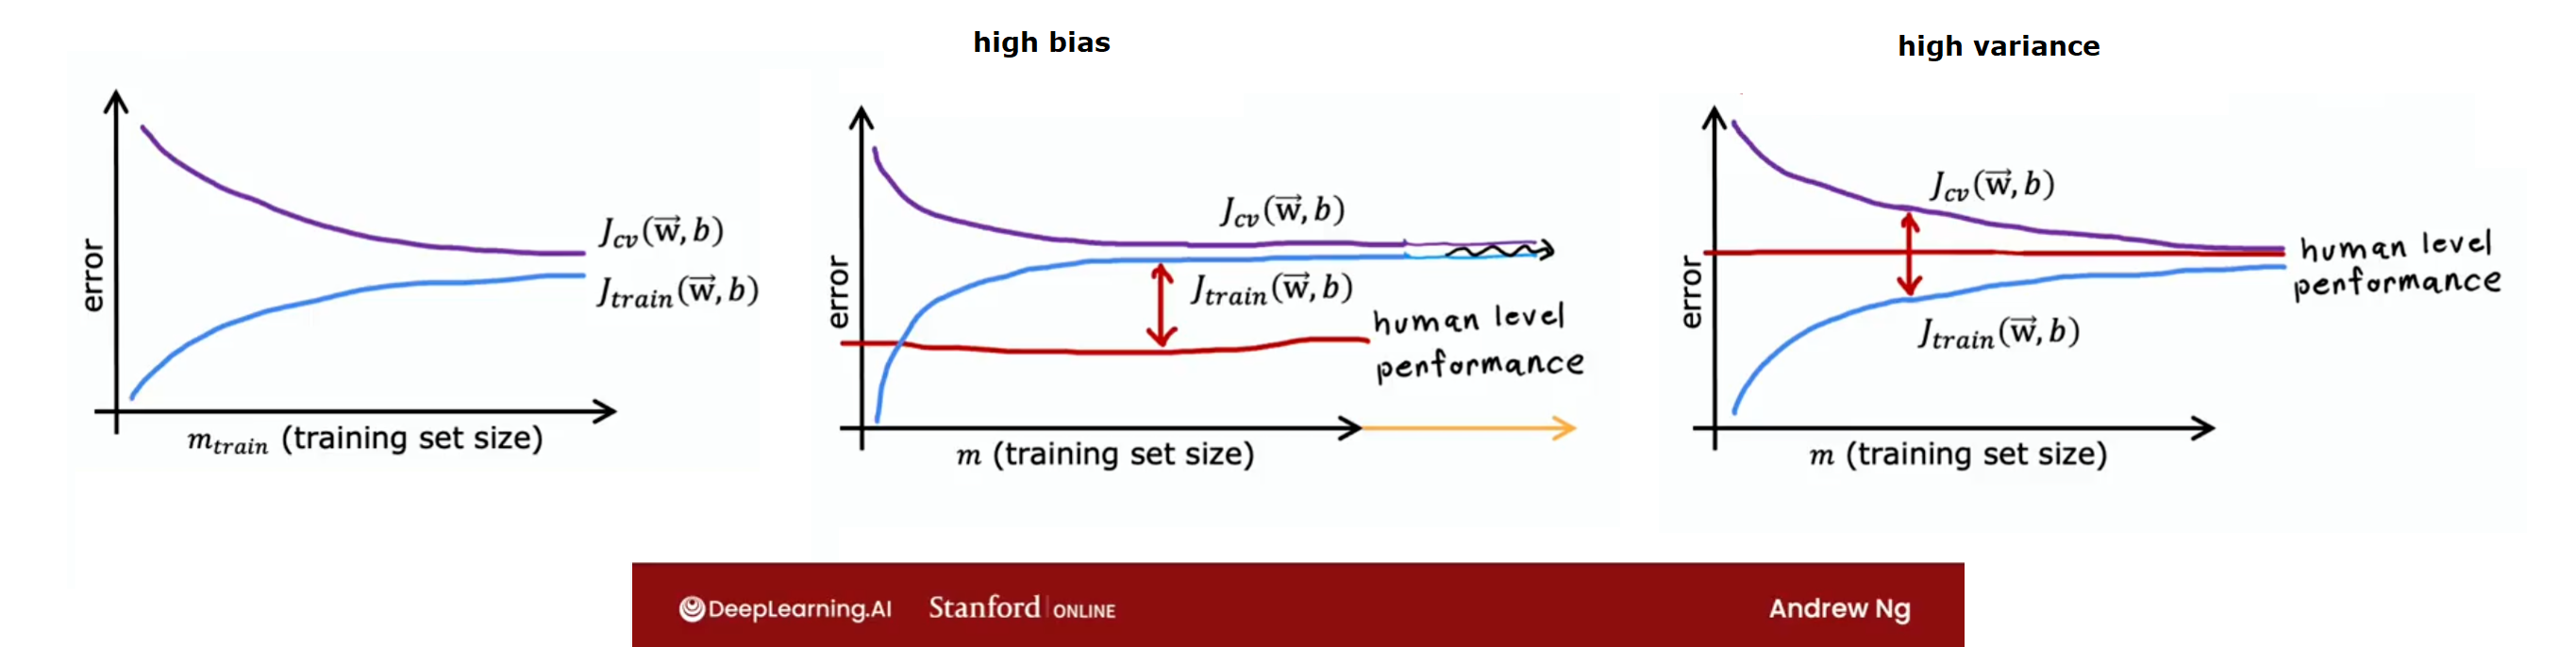

* When you have a very small number of training examples, it is relatively easy to get zero or very small training error, but when the training set gets larger, it becomes harder to fit all the training examples perfectly and the training error increases. The cross-validation error will typically be higher than the training error because you fit the parameters to the training set. You shoud always expect to do at least a little bit better or when $m$ is small, maybe even a lot better on the training set than on the cross validation set. 
* For a model with high bias, the training error will go up as expected and then may start to flatten out (reaching a plateau). That's because as you get more and more training examples, your model doesn't actually learn any better parameters. The model is just too simple to be fitting into this much data and keeps on underfitting as you get more and more examples. Similarly, your cross-validation error will come down and also fattened out after a while but will remain higher than $J_{train}$. If you had a measure of a baseline level of performance, such as human-level performance, then it will tend to be much lower than your $J_{train}$ and your $J_{cv}$. The big gap between the baseline level of performance and $J_{train}$ is the indicator for a learning algorithm having high bias. This situation can never improve with a bigger training set - getting more training data will not bring down the error rate that much. 
* For a model with high variance, even though it may initially fit the training data very well, it doesn't generalize. $J_{train}$ will be going up as the training set size increases. $J_{cv}$ will be much higher than $J_{train}$ and this huge gap can tell you that this is a model with high-variance. Compared to a baseline level of performance, such as human level performance, it may turn out, that $J_{train}$ can sometimes be even lower than it. If you're overfitting the training set, you may be able to fit the training set so well to have an unrealistically low error or even zero error. When you have high variance, then increasing the training set size could help a lot, and in particular, the training error may continue to go up, but then the cross-validation error may come down and approach $J_{train}$. So in this scenario, it might be possible just by increasing the training set size to lower $J_{cv}$ , which is unlike the high bias case.



#### AHow to fix high bias and high varians

* With high bias:
  * Add more features - adding more information to the model makes it more complex.
  * Add polynomial features.
  * Decrease $\lambda$ - pay less attention to regularization. In this case the model is better fitted to the dataset, but generalize less.
* With high variance:
  * Get more training data
  * Try smaller set of features - a less complex model.
  * Increase $\lambda$ - pay more attention to regularization and get smaller model parameters. In this case the model generalize better, but is less flexible tp fit complex curves.
* It is always a trade-off between generalization and flexibility!
* Bias and variance concepts take a short time to learn but a lifetime to master.

